In [39]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [40]:
# Initialize the dictionary to store the data
results_dict = {}
validity_dict = {}

# Open the file in read mode
with open('val_results_SUTTFFP_diff_sizes.txt', 'r') as file:
    # Read lines in chunks of three
    while True:
        # Read the next three lines
        line1 = file.readline().strip()
        line2 = file.readline().strip()
        line3 = file.readline().strip()
        
        # Break the loop if EOF is reached
        if not line3:
            break
        
        # Extract key components from the first line
        # Format: Processing val_search/MI/MI_-6.0_-1.5_config_results
        #print(parts)
        parts = line1.split('/')
        identifier = parts[1]  # Extract 'MI'
        config = parts[2].split('_')[-4:-2]  # Extract '-6.0' and '-1.5'
        key = (identifier, config[0],config[1])
        print(key)
        # Extract the values from the third line
        values = tuple(map(float, line3.split()))
        
        # Add to the dictionary
        results_dict[key] = values
        
        # Check if the second line contains "93" and add to the validity dictionary
        is_valid = '93.00' in line2
        validity_dict[key] = is_valid

# Print the resulting dictionary
#print(results_dict)
#print(validity_dict)
print(len(results_dict.keys()))

('graph_clusters_117', '-12.0', '-1.5')
('graph_clusters_117', '-14.0', '-1.5')
('graph_clusters_137', '-10.0', '-1.5')
('graph_clusters_137', '-12.0', '-1.5')
('graph_clusters_137', '-14.0', '-1.5')
('graph_clusters_137', '-16.0', '-1.5')
('graph_clusters_137', '-18.0', '-1.5')
('graph_clusters_137', '-8.0', '-1.5')
('graph_clusters_180', '-10.0', '-1.5')
('graph_clusters_180', '-12.0', '-1.5')
('graph_clusters_180', '-14.0', '-1.5')
('graph_clusters_180', '-16.0', '-1.5')
('graph_clusters_180', '-8.0', '-1.5')
('graph_clusters_20', '-10.0', '-1.0')
('graph_clusters_20', '-10.0', '-1.5')
('graph_clusters_20', '-12.0', '-1.0')
('graph_clusters_20', '-12.0', '-1.5')
('graph_clusters_256', '-10.0', '-1.5')
('graph_clusters_256', '-10.0', '-2.0')
('graph_clusters_256', '-12.0', '-1.5')
('graph_clusters_256', '-12.0', '-2.0')
('graph_clusters_256', '-14.0', '-1.5')
('graph_clusters_256', '-14.0', '-2.0')
('graph_clusters_256', '-16.0', '-1.5')
('graph_clusters_256', '-16.0', '-2.0')
('grap

In [41]:
best_by_method = {}
best_oe_by_method = {}
results_by_method_dict = {}
# Iterate over the results dictionary
for key, val in results_dict.items():
   # if validity_dict[key]:
    first_entry = key[0]  # Extract the first part of the key (e.g., 'MI')
    if first_entry not in results_by_method_dict:
        results_by_method_dict[first_entry] = []
    results_by_method_dict[first_entry].append(list(val) + [key[1],key[2],validity_dict[key]])  # Collect val[0] for this first entry

for key, triples in results_by_method_dict.items():
    print(key)
    sorted_triples = sorted(triples, key=lambda x: x[1], reverse = True)

    # Print each triple with values rounded to the 4th decimal
    for triple in sorted_triples:
        print(f"{round(triple[0], 4):.4f}, {round(triple[1], 4):.4f}, {round(triple[2], 4):.4f}, {triple[3]}, {triple[4]}, {triple[5]}")
    best_by_method[key]=tuple(sorted_triples[0][:3])
    best_oe_by_method[key] = tuple(sorted_triples[0][3:5])


graph_clusters_117
0.8938, 0.6284, 0.1445, -14.0, -1.5, True
0.8900, 0.6249, 0.1440, -12.0, -1.5, True
graph_clusters_137
0.8784, 0.6524, 0.1501, -8.0, -1.5, True
0.8765, 0.6432, 0.1378, -12.0, -1.5, True
0.8777, 0.6420, 0.1458, -10.0, -1.5, True
0.8826, 0.6398, 0.1389, -14.0, -1.5, True
0.8834, 0.6312, 0.1287, -16.0, -1.5, True
0.8776, 0.6274, 0.1330, -18.0, -1.5, True
graph_clusters_180
0.8977, 0.6747, 0.1557, -8.0, -1.5, True
0.8893, 0.6680, 0.1531, -10.0, -1.5, True
0.8822, 0.6675, 0.1584, -12.0, -1.5, True
0.8964, 0.6543, 0.1571, -14.0, -1.5, True
0.8762, 0.6535, 0.1507, -16.0, -1.5, True
graph_clusters_20
0.8991, 0.6166, 0.1251, -10.0, -1.0, True
0.8943, 0.6136, 0.1271, -10.0, -1.5, True
0.8837, 0.6095, 0.1329, -12.0, -1.0, True
0.8903, 0.5904, 0.1242, -12.0, -1.5, True
graph_clusters_256
0.9318, 0.6852, 0.1587, -6.0, -1.5, True
0.9206, 0.6736, 0.1491, -12.0, -1.5, True
0.9232, 0.6709, 0.1543, -8.0, -1.5, True
0.9173, 0.6709, 0.1524, -10.0, -1.5, True
0.9134, 0.6692, 0.1453, -6.0

In [42]:
num_centers = []
results = []
for key,triple in best_by_method.items():
    print(f"{key:>15} {round(triple[0], 4):.4f}, {round(triple[1], 4):.4f}, {round(triple[2], 4):.4f}")
    print(int(key.split('_')[-1]))
    num_centers.append(int(key.split('_')[-1]))
    results.append((triple[0],triple[1],triple[2]))

graph_clusters_117 0.8938, 0.6284, 0.1445
117
graph_clusters_137 0.8784, 0.6524, 0.1501
137
graph_clusters_180 0.8977, 0.6747, 0.1557
180
graph_clusters_20 0.8991, 0.6166, 0.1251
20
graph_clusters_256 0.9318, 0.6852, 0.1587
256
graph_clusters_26 0.8665, 0.6295, 0.1318
26
graph_clusters_38 0.9053, 0.6379, 0.1360
38
graph_clusters_53 0.8706, 0.6373, 0.1250
53
graph_clusters_61 0.8855, 0.6460, 0.1401
61
graph_clusters_70 0.8561, 0.6244, 0.1242
70
graph_clusters_92 0.9018, 0.6624, 0.1485
92


In [31]:
[results[_][i] for _ in range(len(results)) ]

[0.144485,
 0.150125,
 0.155718,
 0.125132,
 0.158704,
 0.14592,
 0.136012,
 0.124956,
 0.140054,
 0.124229,
 0.14851]

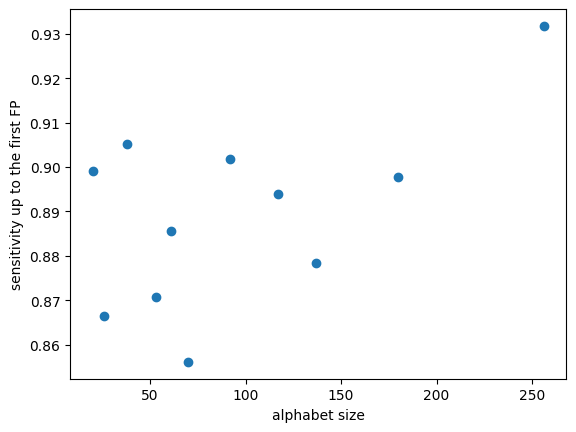

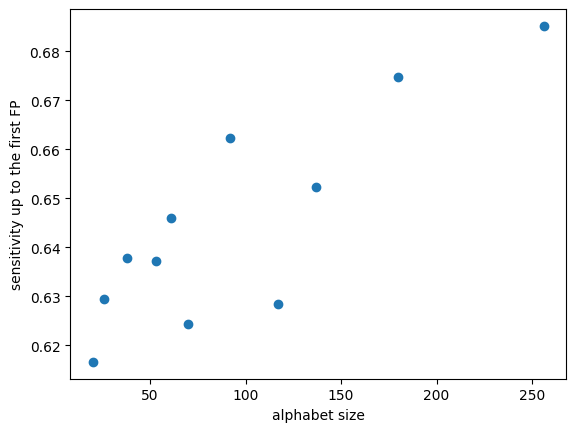

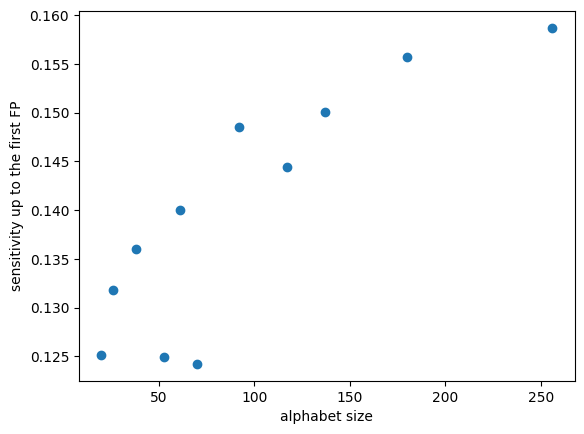

In [43]:
for i in range(3):
    plt.scatter(num_centers, [results[_][i] for _ in range(len(results)) ])
    plt.xlabel("alphabet size")
    plt.ylabel("sensitivity up to the first FP")
    plt.show()

In [44]:
# we will use FS default params; not that different
results_for_chosen_oe  = best_by_method
chosen_oe_by_method = best_oe_by_method
for l in results_by_method_dict["3Di"]:
    if l[3] == '-10.0' and l[4]=='-0.5':
        results_for_chosen_oe["3Di"] = tuple(l[:3])
        chosen_oe_by_method["3Di"] = ('-10.0', '-1.0')

KeyError: '3Di'

In [8]:
results_for_chosen_oe

{'3Di': (0.891199, 0.64522, 0.181766),
 'aa': (0.699966, 0.269757, 0.00860398),
 'BV': (0.949555, 0.741886, 0.22563),
 'dihedral': (0.860102, 0.521812, 0.113448),
 'graph_clusters': (0.875842, 0.609359, 0.166181),
 'jaccard_vqvae': (0.891711, 0.563179, 0.117979),
 'MI': (0.844447, 0.621051, 0.122784)}

In [9]:
chosen_oe_by_method

{'3Di': ('-10.0', '-1.0'),
 'aa': ('-6.0', '-0.5'),
 'BV': ('-8.0', '-1.0'),
 'dihedral': ('-6.0', '-0.5'),
 'graph_clusters': ('-10.0', '-0.5'),
 'jaccard_vqvae': ('-12.0', '-0.5'),
 'MI': ('-6.0', '-2.0')}

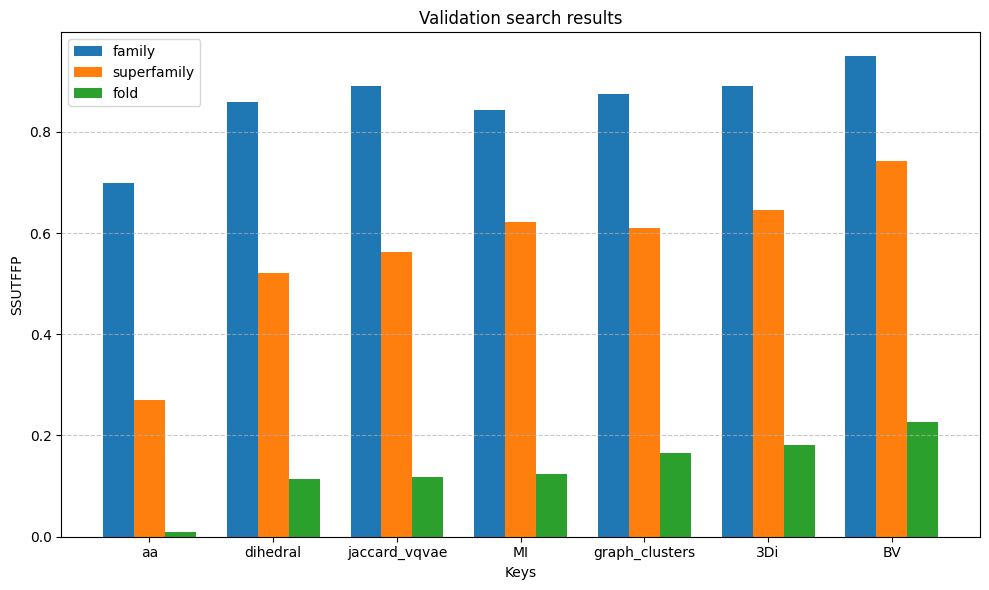

In [26]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid behind bars (only on y-axis)
# Set the positions for the bars
bar_width = 0.25
index = np.arange(len(results_for_chosen_oe))  # The x positions for each group of bars

# Define colors for the bars (optional)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

names = ['aa', 'dihedral', 'jaccard_vqvae', 'MI', 'graph_clusters', '3Di', 'BV']


# Loop through each key in the dictionary
for i, key in enumerate(names):
    values= results_for_chosen_oe[key]
    # Plot the three bars for the current key
    ax.bar(index[i] - bar_width, values[0], bar_width, color=colors[0], label="family" if i == 0 else "")
    ax.bar(index[i], values[1], bar_width, color=colors[1], label="superfamily" if i == 0 else "")
    ax.bar(index[i] + bar_width, values[2], bar_width, color=colors[2], label="fold" if i == 0 else "")

# Add labels, title, and legend
ax.set_xlabel('Keys')
ax.set_ylabel('SSUTFFP')
ax.set_title('Validation search results')
ax.set_xticks(index)
ax.set_xticklabels(names)  # Set the x-axis labels as the dictionary keys
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Is mean LDDT or spearman a better indicator of search performance?

In [15]:
smd = pickle.load(open("mean_spearman_for_all_options.pkl","rb"))

In [19]:
names = ['aa', 'dihedral', 'jaccard_vqvae', 'graph_clusters', 'MI', '3Di', 'BV']
tab_colors_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'gold']
method_to_color = dict(zip(names, tab_colors_list))

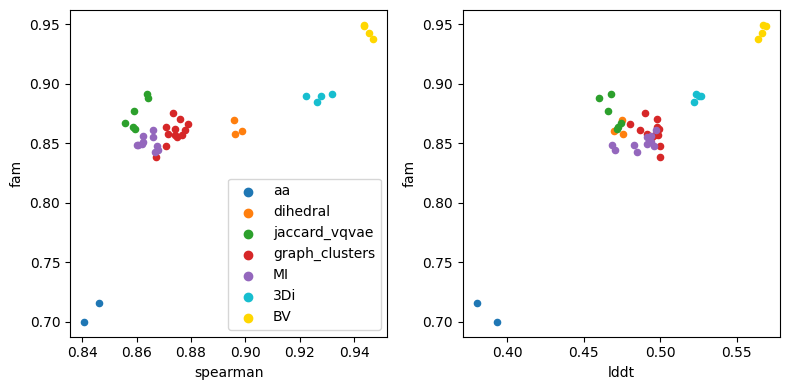

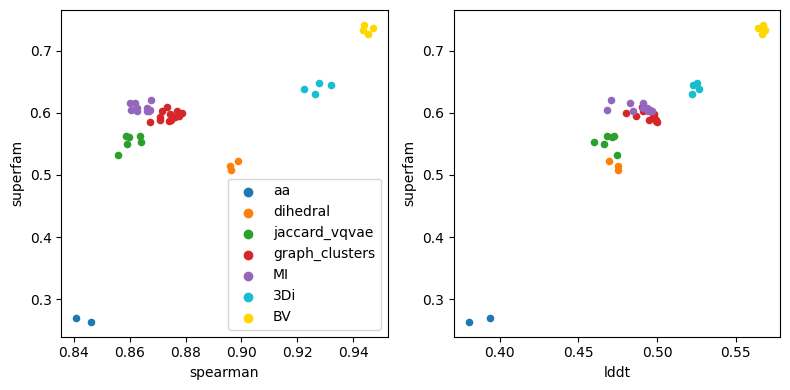

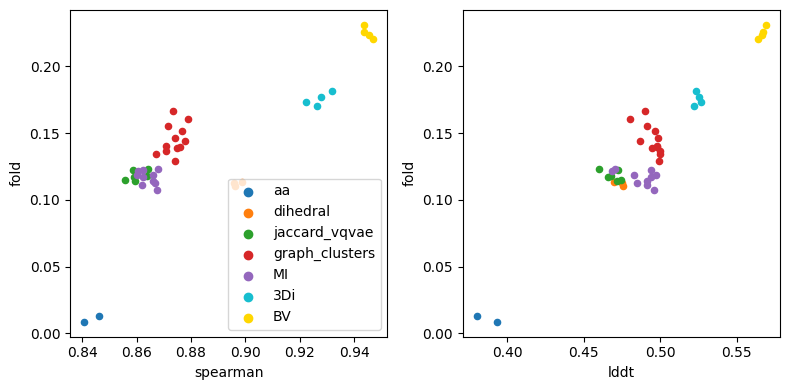

In [20]:

for level, num in [("fam",0),("superfam",1),("fold",2)]:
    # Create two subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

    # First subplot: Scatter plot of smd[run][0] vs results[1]
    for run, results in results_dict.items():
        ax1.scatter(smd[run][0], results[num], color=method_to_color[run[0]],s = 20)

    # Add legend for the first subplot
    for name, color in method_to_color.items():
        ax1.scatter([], [], color=color, label=name)
    ax1.legend()
    ax1.set_xlabel("spearman")
    ax1.set_ylabel(level)

    # Second subplot: Scatter plot of smd[run][1] vs results[1]
    for run, results in results_dict.items():
        ax2.scatter(smd[run][1], results[num], color=method_to_color[run[0]],s = 20)

    # Add legend for the second subplot
    
    ax2.set_xlabel("lddt")
    ax2.set_ylabel(level)

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plots
    plt.show()



## write config files for the test set search

In [27]:
# for non-blurry
data_path = "/cluster/tufts/pettilab/shared/structure_comparison_data"
ref_path =f"protein_data/ref_names.csv"
query_list_dir_path = f"protein_data/test_queries_by_10"
coord_path = "protein_data/allCACoord.npz"
for alphabet in chosen_oe_by_method.keys():
    if alphabet == "BV": continue
    p = pickle.load(open(f"{data_path}/alphabets/{alphabet}_karlin_params.pkl", "rb"))
    go, ge =chosen_oe_by_method[alphabet]
    path_to_config = f"test_search/{alphabet}_{go}_{ge}_config"
    with open(path_to_config, 'w') as file:
        file.write(f"data_path: {data_path}" + '\n')
        file.write(f"coord_d: {coord_path}" + '\n')
        file.write(f"oh_d1: alphabets/{alphabet}.npz" +'\n')
        file.write(f"blosum1: alphabets/{alphabet}_blosum.npy" +'\n')
        file.write(f"gap_open: {go}" + '\n')
        file.write(f"gap_extend: {ge}" + '\n')
        file.write(f"lam: {p["lam"]}" + '\n')
        file.write(f"k: {p["k"]}" + '\n')
        file.write(f"refs: {ref_path}"+ '\n')
        file.write(f"query_list_dir: {query_list_dir_path}"+ '\n') 

In [24]:
#for blurry
data_path = "/cluster/tufts/pettilab/shared/structure_comparison_data"
ref_path =f"protein_data/ref_names.csv"
query_list_dir_path = f"protein_data/test_queries_by_10"
coord_path = "protein_data/allCACoord.npz"
for alphabet in chosen_oe_by_method.keys():
    if alphabet != "BV": continue
    go, ge =chosen_oe_by_method[alphabet]
    path_to_config = f"test_search/{alphabet}_{go}_{ge}_config"
    with open(path_to_config, 'w') as file:
        file.write(f"data_path: {data_path}" + '\n')
        file.write(f"coord_d: {coord_path}" + '\n')
        file.write(f"oh_d1: blurry_vec/nHot.npz" +'\n')
        file.write(f"blosum1: blurry_vec/transition_mtx.npy" +'\n')
        file.write("blurry: True"+ '\n')
        file.write("jaccard_blosum_list: blurry_vec/jaccard_blosum_int.npy"+ '\n')
        file.write(f"gap_open: {go}" + '\n')
        file.write(f"gap_extend: {ge}" + '\n')
        # see build_BLOSUM_from_jaccard
        file.write("lam: 0.497953" + '\n')
        file.write("k: 0.203836 " + '\n')
        file.write(f"refs: {ref_path}"+ '\n')
        file.write(f"query_list_dir: {query_list_dir_path}"+ '\n') 